<a href="https://colab.research.google.com/github/JonathanJuradoS/Clustering_GMM/blob/main/Caso_Practico_GMM_vs_AHC_AppMovil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📱 Clustering de Usuarios de App Móvil: GMM vs Agglomerative

**Objetivo:** Segmentar clientes según su comportamiento en la app móvil, comparando GMM y clustering jerárquico con visualizaciones 2D/3D y análisis de métricas.

## 📦 Paso 1: Importar Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from mpl_toolkits.mplot3d import Axes3D

## 📁 Paso 2: Cargar y explorar el dataset

In [2]:
df = pd.read_csv("/content/caso_practico_uso_aplicacion_clientes.csv")
df.describe()

,interacciones_app,tiempo_uso_app,tickets_soporte,calificacion_satisfaccion
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,19.944000,30.223790,1.504800,7.502237
std,4.480991,9.995858,1.232835,1.190673
min,5.000000,5.000000,0.000000,3.090237
25%,17.000000,23.338945,1.000000,6.708598
50%,20.000000,30.154905,1.000000,7.496067
75%,23.000000,36.895621,2.000000,8.320387
max,39.000000,65.692797,8.000000,10.000000


## 🔍 Paso 3: Visualizar relaciones con Pairplot

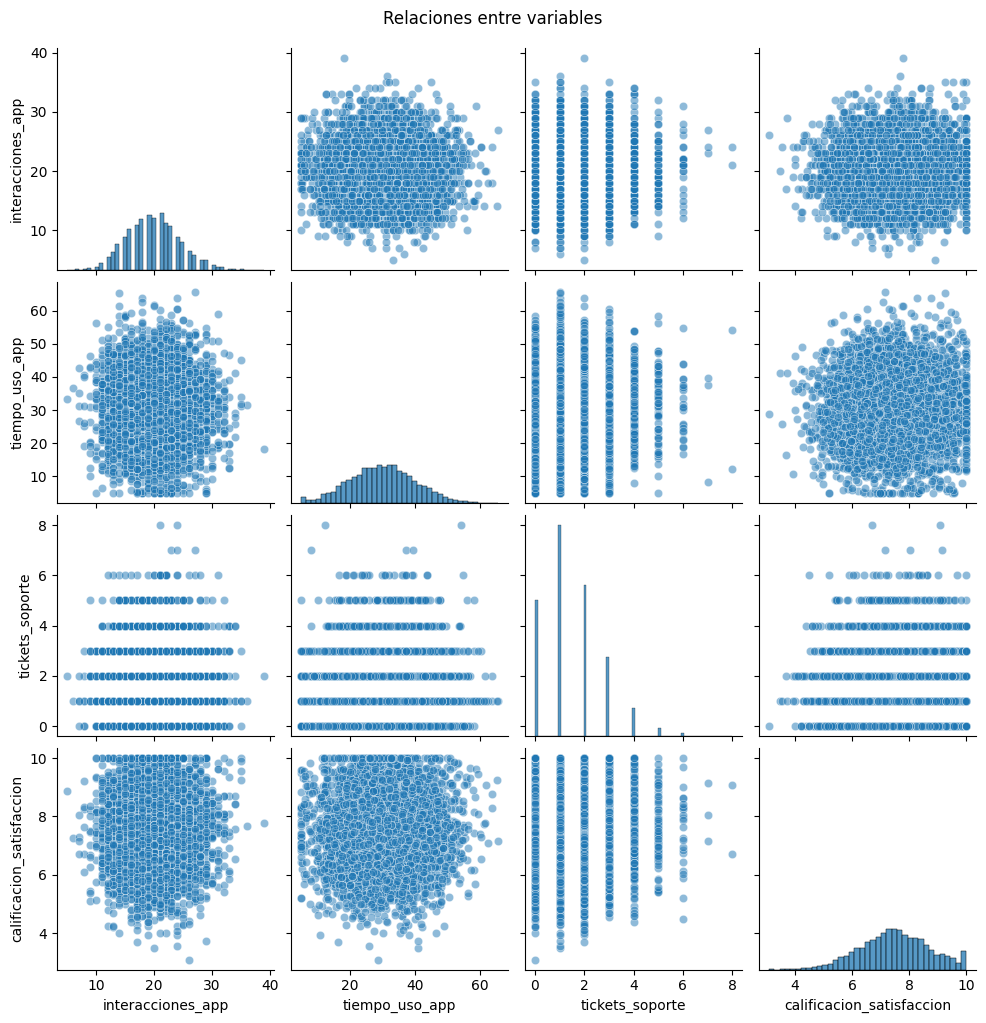

In [3]:
sns.pairplot(df, plot_kws={'alpha':0.5})
plt.suptitle("Relaciones entre variables", y=1.02)
plt.show()

## ⚙️ Paso 4: Estandarización y Reducción de Dimensionalidad (PCA)

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

## 🤖 Paso 5: Clustering con GMM

In [5]:
gmm = GaussianMixture(n_components=4, random_state=42)
labels_gmm = gmm.fit_predict(X_scaled)

## 🔗 Paso 6: Clustering Jerárquico (Agglomerative)

In [6]:
agg = AgglomerativeClustering(n_clusters=4, linkage='ward', metric='euclidean')
labels_agg = agg.fit_predict(X_scaled)

## 📊 Paso 7: Visualización PCA 2D de Resultados

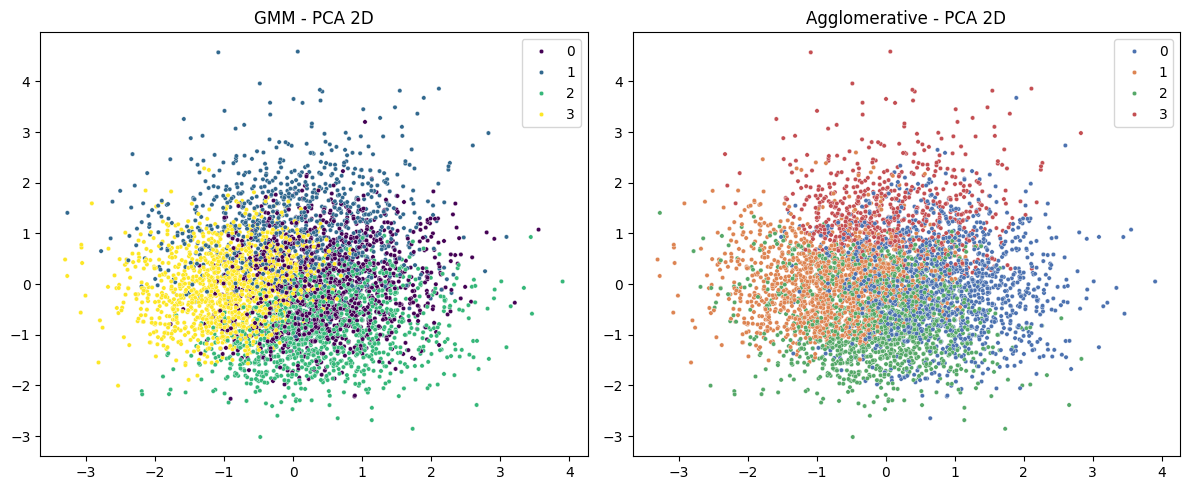

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=X_pca_2d[:,0], y=X_pca_2d[:,1], hue=labels_gmm, palette='viridis', s=10)
plt.title("GMM - PCA 2D")

plt.subplot(1,2,2)
sns.scatterplot(x=X_pca_2d[:,0], y=X_pca_2d[:,1], hue=labels_agg, palette='deep', s=10)
plt.title("Agglomerative - PCA 2D")
plt.tight_layout()
plt.show()

## 🌐 Paso 8: Visualización PCA 3D

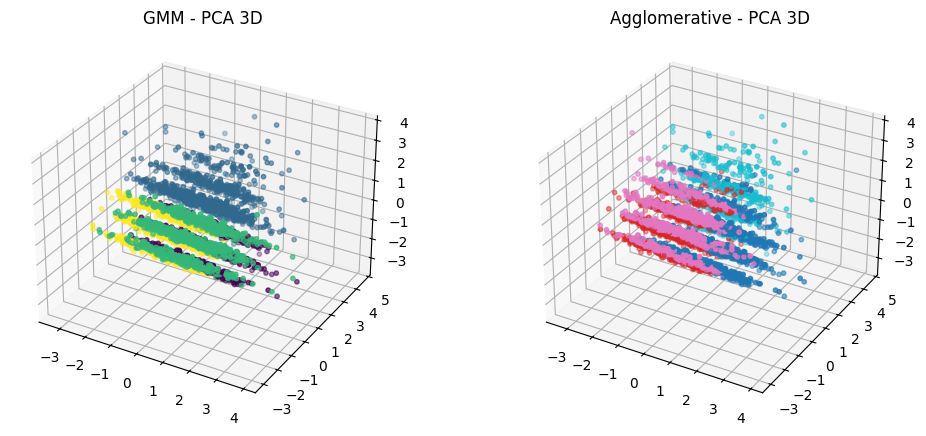

In [8]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_pca_3d[:,0], X_pca_3d[:,1], X_pca_3d[:,2], c=labels_gmm, cmap='viridis', s=10)
ax.set_title("GMM - PCA 3D")

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_pca_3d[:,0], X_pca_3d[:,1], X_pca_3d[:,2], c=labels_agg, cmap='tab10', s=10)
ax2.set_title("Agglomerative - PCA 3D")
plt.show()

## 📐 Paso 9: Evaluación con Métricas
**Silhouette Score:** mide cuán similares son los puntos dentro de un clúster (más alto es mejor).

**Davies-Bouldin Score:** evalúa separación entre clústeres (más bajo es mejor).

In [9]:
sil_gmm = silhouette_score(X_scaled, labels_gmm)
db_gmm = davies_bouldin_score(X_scaled, labels_gmm)
sil_agg = silhouette_score(X_scaled, labels_agg)
db_agg = davies_bouldin_score(X_scaled, labels_agg)

print(f"GMM - Silhouette: {sil_gmm:.4f} | Davies-Bouldin: {db_gmm:.4f}")
print(f"Agglomerative - Silhouette: {sil_agg:.4f} | Davies-Bouldin: {db_agg:.4f}")

GMM - Silhouette: 0.1618 | Davies-Bouldin: 1.5645
Agglomerative - Silhouette: 0.1074 | Davies-Bouldin: 1.8905


## ✅ Conclusiones Finales del Análisis Comparativo: GMM vs Agglomerative Clustering

### 📌 Resultados Obtenidos

- **Gaussian Mixture Model (GMM)**
  - Silhouette Score: **0.1618**
  - Davies-Bouldin Score: **1.5645**

- **Agglomerative Clustering**
  - Silhouette Score: **0.1074**
  - Davies-Bouldin Score: **1.8905**

### 📊 Interpretación de Métricas

- **Silhouette Score** mide la calidad del agrupamiento considerando cohesión y separación. Un valor más alto indica que los puntos están bien agrupados respecto a su clúster y lejos de otros.  
  → *GMM obtuvo un valor mayor, lo que refleja mejor definición de los clústeres.*

- **Davies-Bouldin Score** evalúa la relación entre la dispersión dentro de los clústeres y la separación entre ellos. Un valor más bajo es preferible.  
  → *GMM también superó a Agglomerative en esta métrica, con clústeres más compactos y separados.*

### 🧠 Conclusión General

- **GMM es el algoritmo que mejor se adaptó** al comportamiento de los usuarios en la aplicación móvil, revelando clústeres con mayor cohesión y separación.
- **Agglomerative Clustering**, aunque útil para construir jerarquías, presentó agrupamientos menos definidos para este caso.
- Se recomienda el uso de **GMM en contextos donde los patrones de comportamiento no son lineales ni fácilmente separables**, como en análisis de interacción digital multicanal.



## ✅ Conclusiones Finales
- **GMM** muestra mejor cohesión (Silhouette) y menor dispersión (DB Score), adaptándose mejor a distribuciones suaves.
- **Agglomerative** es útil para explorar jerarquías, pero menos eficaz en este contexto.
- Ambos modelos ayudan a descubrir perfiles valiosos de usuarios para personalización y soporte técnico estratégico.